## Inpainter using Stable Diffusion Inpainting

> The current notebook is part of [AI Image Editing and Manipulation](https://github.com/afondiel/computer-vision-challenge/blob/main/L2_06_AI_Assisted_Image_Editing_and_Manipulation/) pipeline from [**Computer Vision Challenge**](https://github.com/afondiel/computer-vision-challenge).

<img width="400" height="400" src="https://github.com/afondiel/computer-vision-challenge/blob/main/L2_06_AI_Assisted_Image_Editing_and_Manipulation/docs/pipeline-last.png?raw=true">


|--|Notebook|Demo (Gradio)|
|--|--|--|
||[![Open notebook in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/afondiel/computer-vision-challenge/blob/main/L2_06_AI_Assisted_Image_Editing_and_Manipulation/notebooks/Inpainter_Stable_Diffusion.ipynb)|[HF Space (Ongoing)](#)|

### Install Dependencies

In [1]:
# Hand-crafted libraries
# These resources are originally from this crash course by DLA: https://github.com/afondiel/Prompt-Engineering-for-Vision-Models-DeepLearningAI
# Highly recommended, if you're looking to get some grasp on the art of prompting for Vision Models
!curl -O https://raw.githubusercontent.com/afondiel/computer-vision-challenge/main/L2_03_AI_Powered_Image_Restoration_and_Enhancement/tools/inpainting/utils_im_seg.py
!curl -O https://raw.githubusercontent.com/afondiel/computer-vision-challenge/main/L2_03_AI_Powered_Image_Restoration_and_Enhancement/tools/inpainting/utils_obj_det.py
!curl -O https://raw.githubusercontent.com/afondiel/computer-vision-challenge/main/L2_03_AI_Powered_Image_Restoration_and_Enhancement/tools/inpainting/utils_im_gen.py
!curl -O https://raw.githubusercontent.com/afondiel/computer-vision-challenge/main/L2_03_AI_Powered_Image_Restoration_and_Enhancement/tools/inpainting/utils_fine_tuning.py

# Download requirements file
!curl -O https://raw.githubusercontent.com/afondiel/Prompt-Engineering-for-Vision-Models-DeepLearningAI/main/requirements.txt

# install dependencies
!pip install -q -r requirements.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7693  100  7693    0     0  23747      0 --:--:-- --:--:-- --:--:-- 23817
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5267  100  5267    0     0  13838      0 --:--:-- --:--:-- --:--:-- 13824
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1809  100  1809    0     0   5247      0 --:--:-- --:--:-- --:--:--  5258
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37012  100 37012    0     0   118k      0 --:--:-- --:--:-- --:--:--  118k
  % Total    % Received % Xferd  Average Speed   Tim

In [2]:
# Hugging Face ecosystem
# !pip install accelerate transformers datasets peft -U

# pytorch multimodality frameworks & model library
# !pip install torch torchvision torchaudio fastai timm -U
!pip install -q torchvision torchaudio fastai timm -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.5/234.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 83.8 MB/s eta 0:00:00


In [3]:
!pip install -q gradio gradio_imageslider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 984.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [4]:
!pip install  -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.0/872.0 kB 19.5 MB/s eta 0:00:00


### Import Libraries

In [5]:
import os
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from transformers import pipeline
from ultralytics import SAM
from diffusers import StableDiffusionInpaintPipeline
import gradio as gr
from gradio_imageslider import ImageSlider

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


### Preprocesssing & Transformation

In [19]:
# Set up device for computation
def get_device():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using {device}")
    return device

# Load the image from file
def load_image(image_path):
    image = Image.open(image_path)
    return image

# Save the masked image
def save_image(image, filename):
    plt.imshow(image)
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

# Get mask per object
def process_mask_input_boxes(input_boxes, masks, object_id):
  """Processes masks based on object ID."""
  try:
    obj = input_boxes[0][object_id - 1]  # Adjust for zero-based indexing
    # print(f"obj{object_id}: {obj}")
    masks, _ = box_prompt(masks, obj)
    return masks
  except IndexError:
    print("Invalid object ID.")
    return None

# Save all the masks objects as masked images
def save_mask(mask, filename):
  plt.imshow(mask, cmap='gray')
  plt.axis('off')
  plt.savefig(filename, bbox_inches='tight', pad_inches=0)
  # plt.close() # Close the figure to avoid displaying it





In [33]:
def display_images(images):
    num_images = len(images)
    # Calculate the number of rows and columns in the grid
    # Handle the case where num_images is not a perfect square
    num_cols = int(np.ceil(np.sqrt(num_images)))
    num_rows = int(np.ceil(num_images / num_cols))

    # Create a figure and axes
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))

    # Flatten the axs array for easier iteration
    axs = axs.flatten()

    for i in range(num_images):
        # Display the image
        axs[i].imshow(images[i])
        axs[i].axis('off')  # Turn off axis labels

    # Hide any unused subplots
    for i in range(num_images, num_rows * num_cols):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

### Inpainter: Pipeline

<img width=800 height=200 src="https://github.com/afondiel/computer-vision-challenge/blob/main/L2_06_AI_Assisted_Image_Editing_and_Manipulation/docs/pipeline0.png?raw=true">


**Notice:**
- Resource Optimization to run the notebook if you're [GPU Poor](https://www.envisioning.io/vocab/gpu-poor) like me ;)

| Task | Hardware Strategy | Software Strategy |
|---|---|---|
| **Object Detection** | Prioritize smaller, more efficient models. | Use `facebook/detr-resnet-50` instead of `google/owlvit-based-patch32`. |
| **Segmentation** | Leverage mobile-optimized models. | Continue using `yolo mobilesam`. |
| **Inpainting** | Choose smaller, less resource-intensive models. | Explore `stabilityai/sd-v1-4` or `stabilityai/sd-v1-5`. Consider models optimized for inpainting or lower resolution outputs. |
| **Code Optimization** | Minimize memory usage. | Reduce batch size, downscale images, limit inference steps, and consider gradient accumulation. |
| **Additional Techniques** | Explore alternative frameworks and optimizations. | Consider TensorFlow Lite, quantization, and memory profiling. |

In [7]:
from utils_obj_det import preprocess_outputs, show_boxes_and_labels_on_image
from utils_im_seg import resize_image, show_points_on_image, show_masks_on_image, box_prompt

# Detect objects in the image using OWL-ViT
def detect_objects(model_id, device, image, text_prompt):
    """
    Detects objects in the image using OWL-ViT.
      Args:
        model_id: The ID of the OWL-ViT model (from HuggingFace).
        device: The device to use for computation.
        image: The input image.
        text_prompt: The text prompt for object detection.

      Returns:
        Input boxes, labels, and scores.
    """
    try:
        detector = pipeline(
            model=model_id,
            task="zero-shot-object-detection",
            device=device
        )
        detector_output = detector(image, candidate_labels=[text_prompt])
        input_scores, input_labels, input_boxes = preprocess_outputs(detector_output)
        return input_boxes, input_labels, input_scores
    except Exception as e:
        print(f"Error loading object detection model {model_id}: {e}")
        return None, None, None

# Segment the image using SAM/SAM2 with Ultralytics ecosystem
def segment_image(model_id, image, input_boxes, labels):
  """
  Segments the image using SAM.
    Args:
      image: The input image.
      input_boxes: The input boxes.
      labels: The labels.

    Returns:
      Masks.
  """
  try:
      segmenter = SAM(model_id)
      segmenter.to(device)
      result = segmenter.predict(
          image,
          bboxes=input_boxes[0],
          labels=labels
        )
      masks = result[0].masks.data
      return masks
  except Exception as e:
      print(f"Error loading segmentation model {model_id}: {e}")
      return None

In [8]:
# Generate inpainted image using Stable Diffusion
def inpaint_image(model_id, image, image_mask, prompt, device, num_inference_steps=10, guidance_scale=7.5, strength=0.75, negative_prompt=None):
  """
  Generates an inpainted image using Stable Diffusion.
    Args:
      model_id: The ID of the Stable Diffusion model (from HuggingFace).
      image: The input image.
      image_mask: The input mask.
      prompt: The prompt for inpainting.
      device: The device to use for computation.
      num_inference_steps: The number of inference steps.
      guidance_scale: The guidance scale.
      strength: The strength of the inpainting.
      negative_prompt: The negative prompt.

    Returns:
      Inpainted image.
  """
  try:
      sd_pipe = StableDiffusionInpaintPipeline.from_pretrained(
          model_id,
          torch_dtype=torch.float16 if torch.cuda.is_available() else torch.bfloat16,
          low_cpu_mem_usage=False if torch.cuda.is_available() else True,
      ).to(device)
  except Exception as e:
      print(f"Error loading Inpainting model {model_id}: {e}")
      print("Please check if the model ID is valid and available.")
      return None

  generator = torch.Generator(device).manual_seed(66733)

  output = sd_pipe(
      image=image,
      mask_image=image_mask,
      prompt=prompt,
      generator=generator,
      num_inference_steps=num_inference_steps,
      guidance_scale=guidance_scale,
      strength=strength,
      negative_prompt=negative_prompt,
  )
  return output.images[0]

In [9]:
# Demo image
!curl -O https://raw.githubusercontent.com/afondiel/computer-vision-challenge/main/L2_03_AI_Powered_Image_Restoration_and_Enhancement/docs/inpainting/dogs.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1048k  100 1048k    0     0  1226k      0 --:--:-- --:--:-- --:--:-- 1225k


### Main: running the App

Using cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

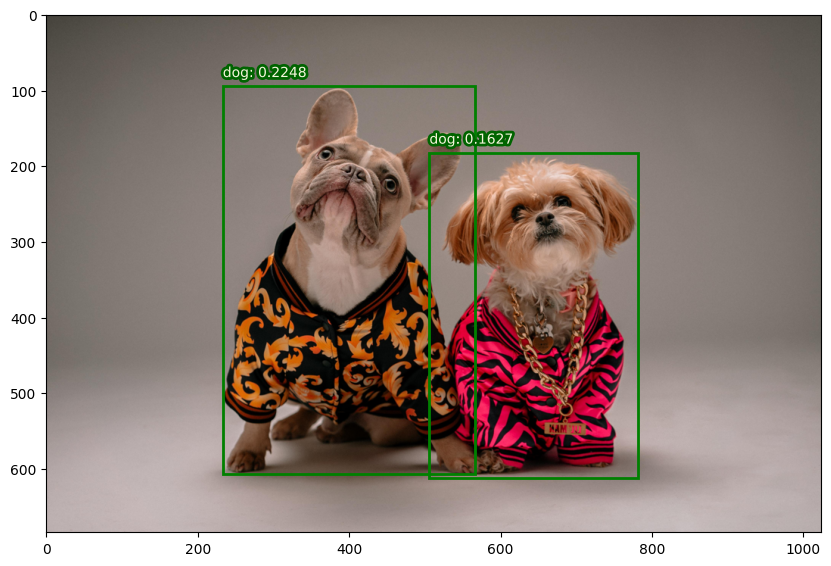

In [10]:
if __name__ == "__main__":
  """
  Inpainting process:
  1. Detect objects in the image using OWL-ViT.
  2. Segment the image using SAM.
  3. Generate inpainted image using Stable Diffusion.
  """

  device = get_device()

  # Load and resize the image
  raw_image = load_image("dogs.jpg")
  resized_image = resize_image(raw_image, input_size=1024)

  # ------------------------------------
  # Object Detection
  # ------------------------------------
model_id = "google/owlvit-base-patch32"
text_prompt = "dog"
input_boxes, input_labels, input_scores = detect_objects(model_id, device=device, image=resized_image, text_prompt=text_prompt)
show_boxes_and_labels_on_image(resized_image, input_boxes[0], input_labels, input_scores)


0: 1024x1024 127.2ms
Speed: 5.0ms preprocess, 127.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)


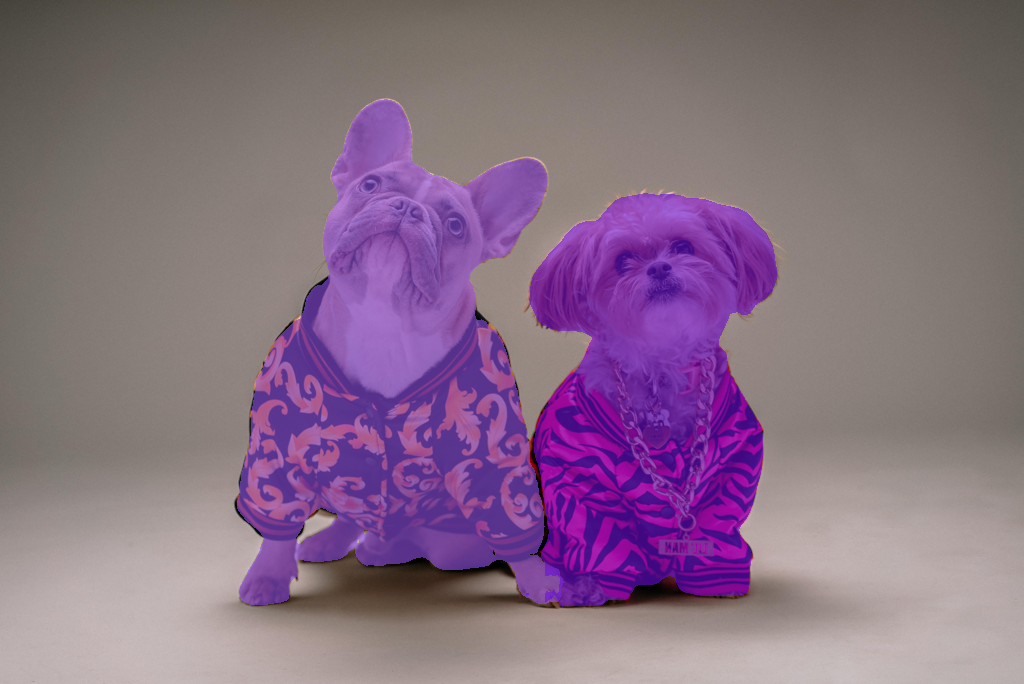

In [16]:
# ------------------------------------
# Image Segmentation
# ------------------------------------

# Model profile & API
sam_dict = { #     model = SAM("mobile_sam.pt")
  "SAM_MOB": "mobile_sam.pt",
  "SAM_B": "sam_b.pt",
  "SAM_L": "sam_l.pt"
}
# fastsam_dict = {
#   "FastSAM_S": "FastSAM-s.pt" # model = FastSAM("FastSAM-s.pt")
# }
# sam_yolo_dict = {
#   "YOLOv8n_seg": "yolov8n-seg.pt" # model = YOLO("yolov8n-seg.pt")
# }

sam2_dict = { # model = SAM("sam2_b.pt")
  "SAM_2_TINY": "sam2_t.pt",
  "SAM_2_SMALL": "sam2_s.pt",
  "SAM_2_BASE": "sam2_b.pt",
  "SAM_2_LARGE": "sam2_l.pt"
}

# process EVERYTHING
labels = np.repeat(1, len(input_boxes))
masks = segment_image(sam_dict['SAM_MOB'], resized_image, input_boxes, labels)

# print(masks)

# show_masks_on_image(resized_image, masks) # cpu
show_masks_on_image(resized_image, masks.cpu().numpy()) # gpu

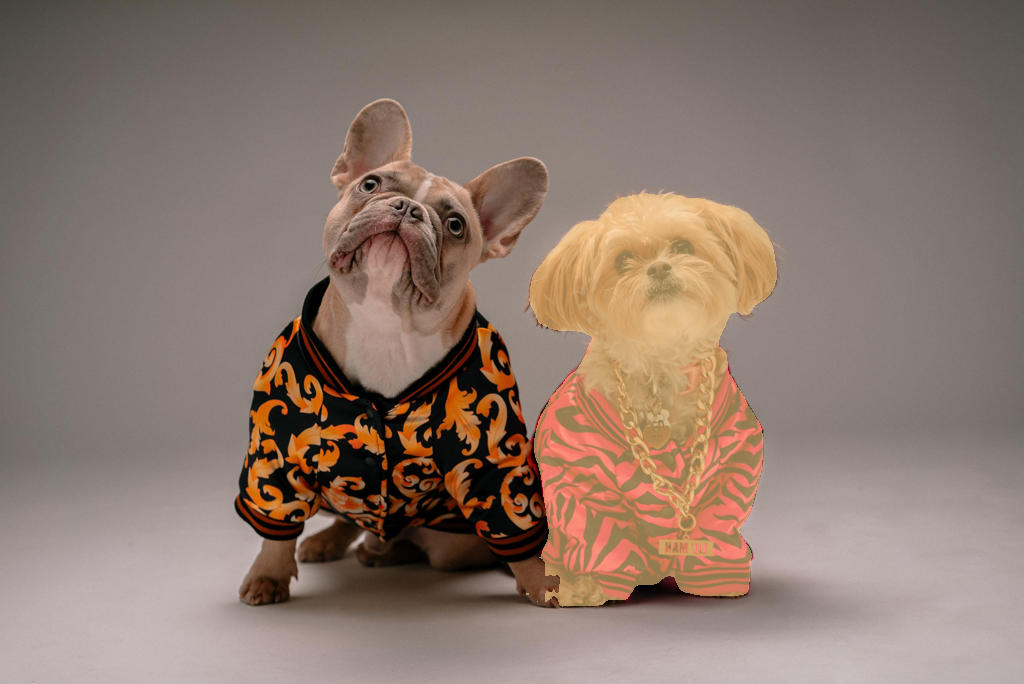

In [20]:
  # ------------------------------------
  # Image Inpainting
  # ------------------------------------
  # Process mask for specific object (e.g., 2 => dog2)
  # object_id = 1
  object_id = 2
  masks_boxes_2 = process_mask_input_boxes(input_boxes, masks, object_id)
  # show_masks_on_image(resized_image, [masks_boxes_1])
  show_masks_on_image(resized_image, [masks_boxes_2])

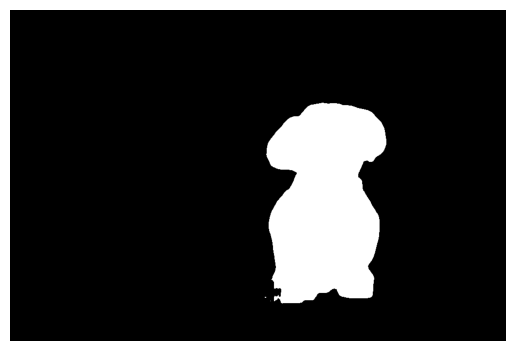

In [21]:
  # Save the mask image
  save_mask(masks_boxes_2, "dog2.png")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

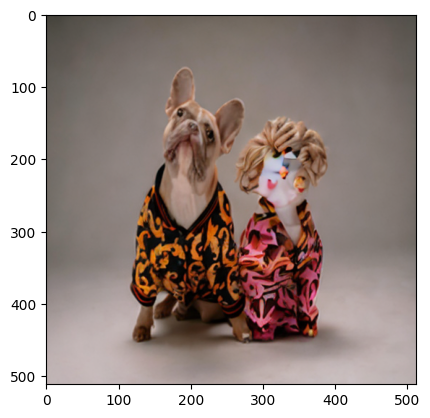

In [23]:
  # Load the mask image
  image_mask = load_image("dog2.png").resize((256, 256))

  prompt = "a realistic cat"

  sd_repo = "stabilityai/stable-diffusion-2-inpainting"
  # Inpainting
  inpainted_image = inpaint_image(sd_repo, raw_image.resize((256, 256)), image_mask, prompt, device=device)

  # Save and display the final image
  save_image(inpainted_image, "generated_image.png")

In [25]:
  # display Image
  # plt.imshow(inpainted_image)

### Output Image Tuning & Adjustment

In [26]:
# Number inference of steps: increases the de-noising process of the image
num_inference_steps = 100 if torch.cuda.is_available() else 10
# Guidance Scale: tells the diffuser how closer it should follow the prompt (high: higher prompt fidelity, but lower image quality...)
guidance_scale_values = [float(x) for x in np.arange(0, 21, 10)]
# Strength: determines how much noise gets added
strength_values = [x for x in np.arange(0.1, 1.1, 0.2)]

In [ ]:
# num_inference_steps=100
inpainted_image = inpaint_image(
    sd_repo,
    raw_image.resize((256, 256)),
    image_mask,
    prompt,
    device=device,
    num_inference_steps=num_inference_steps
)

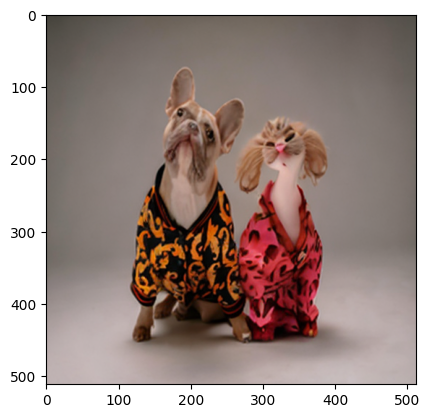

In [28]:
  plt.imshow(inpainted_image)

In [29]:
img_list=[]
for guidance_scale in guidance_scale_values:
  inpainted_image = inpaint_image(
      sd_repo,
      raw_image.resize((256, 256)),
      image_mask,
      prompt,
      device=device,
      num_inference_steps=num_inference_steps,
      guidance_scale=guidance_scale,
  )
  img_list.append(inpainted_image)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

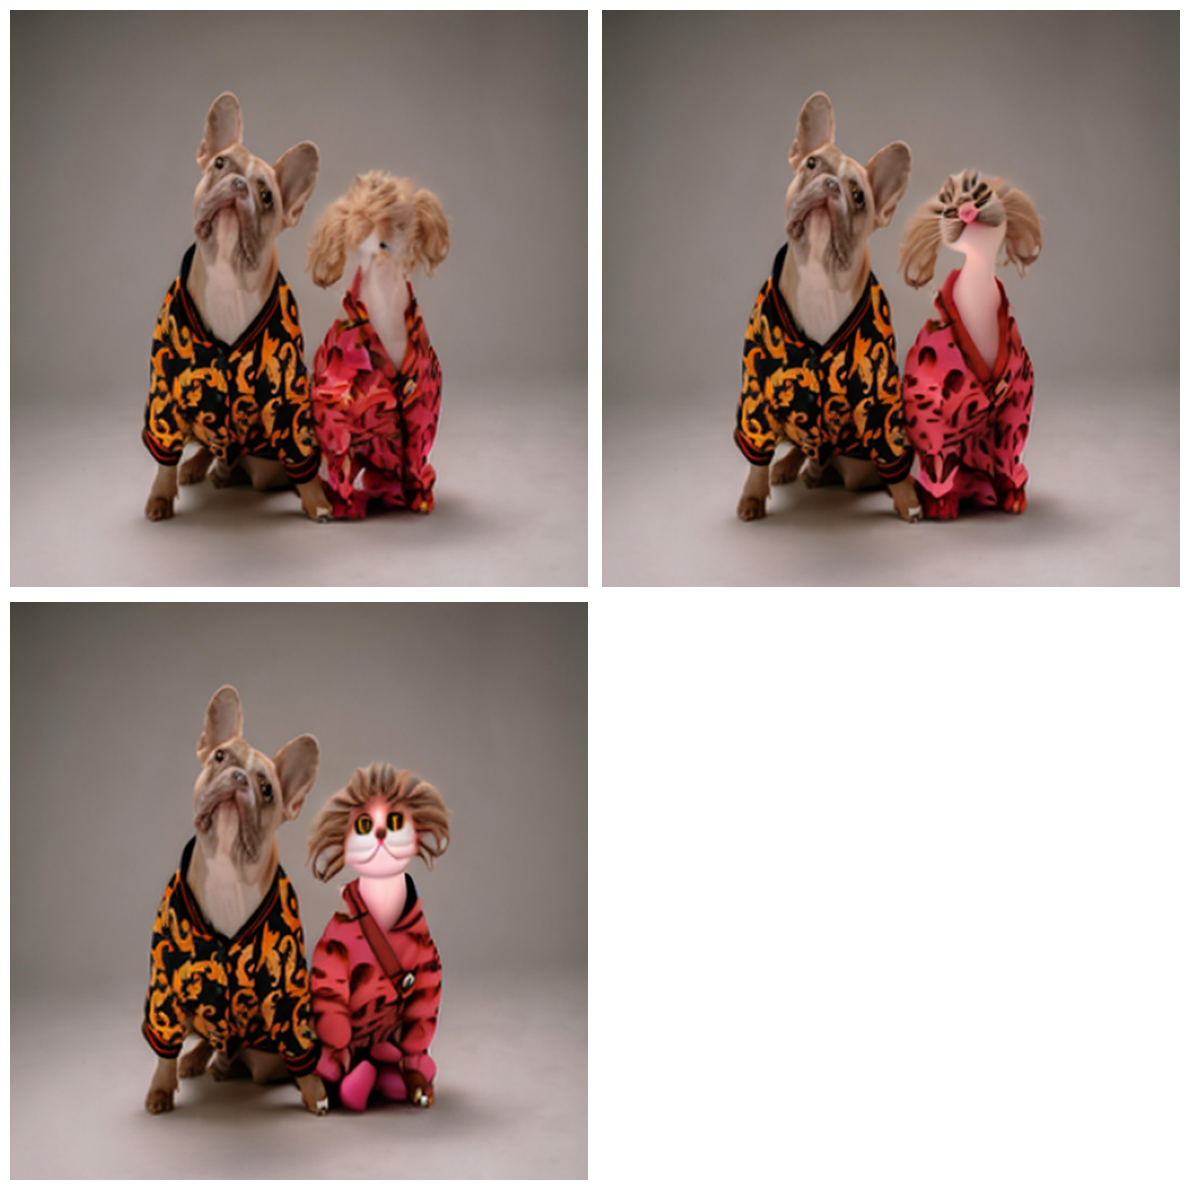

In [34]:
display_images(img_list)

In [35]:
img_list_s=[]
for strength_value in strength_values:
  inpainted_image = inpaint_image(
      sd_repo,
      raw_image.resize((256, 256)),
      image_mask,
      prompt,
      device=device,
      num_inference_steps=num_inference_steps,
      strength=strength_value,
  )
  img_list_s.append(inpainted_image)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

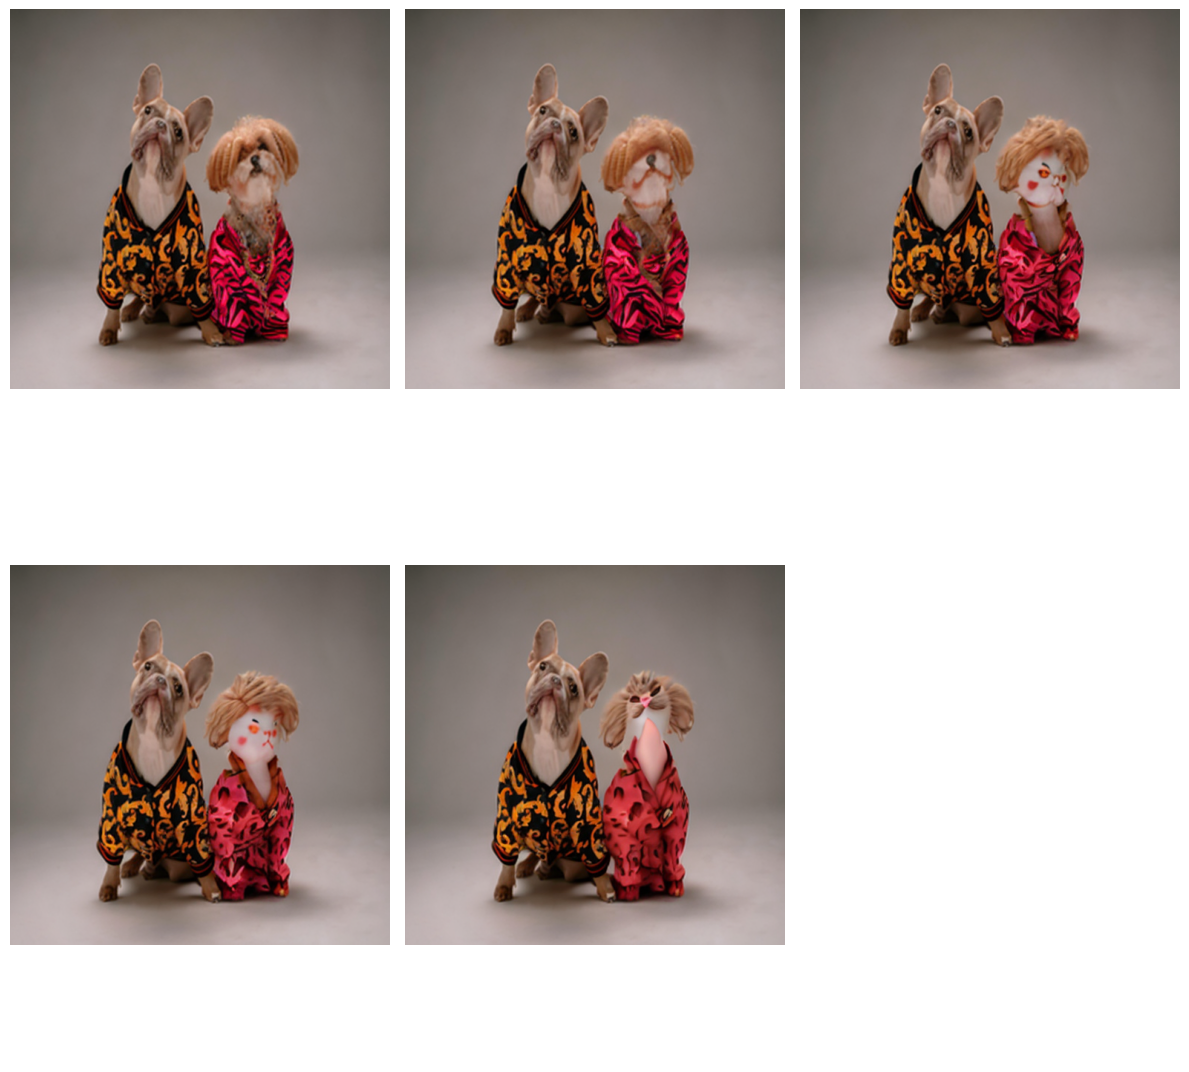

In [36]:
display_images(img_list_s)

### App Demo with Gradio

In [ ]:
# Function to launch the Gradio demo
def launch_gradio_demo():
    """
    Launches a Gradio demo for inpainting images.
    """
    def inpaint_with_gradio(image, mask, prompt):
        device = get_device()

        # Resize input images to match the expected model input size
        image = image.resize((256, 256))
        mask = mask.resize((256, 256))

        # Perform inpainting
        inpainted_image = inpaint_image(image, mask, prompt, device)

        return [image, inpainted_image]

    demo = gr.Interface(
        fn=inpaint_with_gradio,
        inputs=[gr.Image(type="pil"), gr.Image(type="pil"), gr.Textbox(label="Inpainting Prompt")],
        outputs=ImageSlider(),
        title="Image Inpainting",
        description="Upload an image and a mask to inpaint the selected area based on a text prompt."
    )

    demo.launch(share=True)

In [ ]:
# Launch demo
# launch_gradio_demo()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3ba6ac2f84397f74e3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## References

**Docs:**

- [AI Image Restoration](https://en.wikipedia.org/wiki/Image_restoration_by_artificial_intelligence)
- [HF Inpainting Doc](https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/inpaint)
- [Vision Prompting Notes - DeepLearning AI](https://github.com/afondiel/Prompt-Engineering-for-Vision-Models-DeepLearningAI/tree/main)
- [SAM (Segment Anything Model) - Ultralytics YOLO Docs](https://docs.ultralytics.com/models/sam/#available-models-supported-tasks-and-operating-modes)

**Datasets:**

- [Popular Inpainting Datasets](https://paperswithcode.com/datasets?task=image-inpainting)

**Models:**

- [SOTA Models for Inpainting](https://paperswithcode.com/task/image-inpainting)

**Papers**
- [GradPaint: Gradient-Guided Inpainting with Diffusion Models](https://arxiv.org/pdf/2309.09614)

**Demo:**
- gr.ImageEditor vs gr.Sketchpad vs gr.gallery
  - Use gr.ImageEditor: This is the most efficient tool for your use case since it allows users to erase specific parts of an image and directly interact with it, making it perfect for inpainting tasks where precision is required.
  - Complement with gr.Sketchpad: If your application involves generating new images from user sketches or masks, consider adding gr.Sketchpad as an input option.


